<a href="https://colab.research.google.com/github/yasarigno/NLP_DeepLearning_Course/blob/main/Project_Classification_of_Books_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Classification of books by genres

# 1. Preparation of the dataset

We work on a dataset on books downloaded from https://www.kaggle.com/datasets/athu1105/book-genre-prediction

In this NLP project we use neural networks to predict the genre of books by using its summary.

In [54]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

If you want to modify a notebook both at local and on colab, you can use the following cell in order to erase or define the path of the file. 

If you work at local, simply put
```python
 Local = True
 ``` 
 

In [55]:
Local = False

In [56]:
if Local:
    data = pd.read_csv("/Users/FIRAT/Desktop/GSU NLP/data.csv")
else:
    data = pd.read_csv("/content/drive/MyDrive/Shared Datasets/Book genres/data.csv")


# Google Colab offers "Data Table Display" extension to turn pandas dataframes into interactive displays that can be filtered, sorted etc.

data

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...
...,...,...,...,...
4652,4652,Hounded,fantasy,"Atticus O’Sullivan, last of the Druids, lives ..."
4653,4653,Charlie and the Chocolate Factory,fantasy,Charlie Bucket's wonderful adventure begins wh...
4654,4654,Red Rising,fantasy,"""I live for the dream that my children will be..."
4655,4655,Frostbite,fantasy,"Rose loves Dimitri, Dimitri might love Tasha, ..."


In [57]:
print(f"The dataset contains {data.shape[0]} lines and {data.shape[1]} columns")

The dataset contains 4657 lines and 4 columns


In [58]:
data.describe(include="all")

,index,title,genre,summary
count,4657.000000,4657,4657,4657
unique,NaN,4296,10,4542
top,NaN,Bloodline,thriller,The incredible true story of the women who fou...
freq,NaN,4,1023,3
mean,2328.000000,NaN,NaN,NaN
std,1344.504432,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN
25%,1164.000000,NaN,NaN,NaN
50%,2328.000000,NaN,NaN,NaN
75%,3492.000000,NaN,NaN,NaN


variable 

categorical variable 
numerical variable
- continuous variable
- discrete variable

# 2. Exploratory Analysis

The variable ``data["genre"]`` will be the target variable whereas ``data['summary']`` contains the textual data. 

Let us see first how they look like.


In [59]:
data["genre"].value_counts()

thriller      1023
fantasy        876
science        647
history        600
horror         600
crime          500
romance        111
psychology     100
sports         100
travel         100
Name: genre, dtype: int64

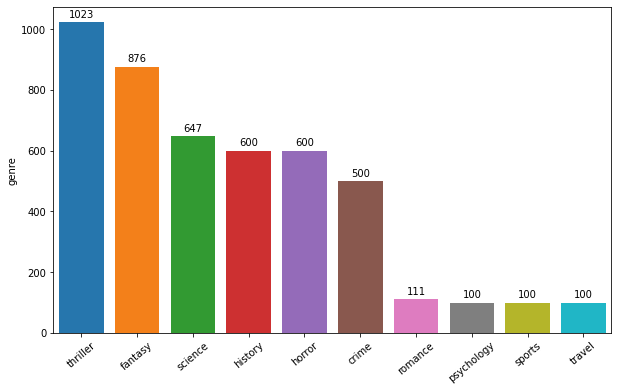

In [60]:
fig = plt.figure(figsize=(10, 6))
plt.xticks(rotation=40)
bp = sns.barplot(
    x=data["genre"].value_counts().index,
    y=data["genre"].value_counts(),
    data=data,
    saturation=0.9,
    # order=order,
    # color='darkred',
    ci=None)

for p in bp.patches:
    bp.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points')
plt.show()

**Note**

histogram - continuos variable 

barplot - discrete variable

In [61]:
data['summary']

0        Drowned Wednesday is the first Trustee among ...
1        As the book opens, Jason awakens on a school ...
2        Cugel is easily persuaded by the merchant Fia...
3        The book opens with Herald-Mage Vanyel return...
4        Taran and Gurgi have returned to Caer Dallben...
                              ...                        
4652    Atticus O’Sullivan, last of the Druids, lives ...
4653    Charlie Bucket's wonderful adventure begins wh...
4654    "I live for the dream that my children will be...
4655    Rose loves Dimitri, Dimitri might love Tasha, ...
4656    The Prince of no value\nBrishen Khaskem, princ...
Name: summary, Length: 4657, dtype: object

### Lowercase the column "summary"

This is simply because we do not need to distinguish words starting with a capital from others.

In [62]:
data['summary'] = data['summary'].str.lower()
data['summary']

In [63]:
if Local:
  from IPython.display import HTML, display
  def set_css():
      display(HTML('''
      <style>
        pre {
            white-space: pre-wrap;
        }
      </style>
      '''))
  get_ipython().events.register('pre_run_cell', set_css)

In [64]:
for i in range(1150, 1160):
    print('\n# {}. {}\n'.format(i, data['genre'][i]))
    print(data['summary'][i])
    print("----------------------" * 5)


# 1150. crime

 the story starts out inside rowena drake's house, which is called "apple trees". there, ariadne oliver and others are preparing a hallowe'en party for children. those in charge of the party are judith butler, mrs. oliver's friend; leopold, joyce and anne reynolds, desmond holland, nicholas ransom, cathie johnson, elizabeth whittaker, beatrice ardley, and others. while they are preparing, thirteen-year old joyce reynolds says that she once saw a murder. everyone, including mrs. oliver, thinks she is lying. the party consists of many hallowe'en-related activities. mrs. goodbody plays the role of a witch, and girls can look into a mirror to know what their future husbands will look like (a picture of the husband is said to be reflected in the mirror). the group has supper, the prizes are granted, and the party ends after a game of snapdragon, with the murder of course fitting into the whole situation. the next day, mrs. oliver goes to london seeking hercule poirot's help.

## 2.1 Tokenization via NLTK

In [65]:
import nltk

In [66]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'[a-zA-Z]+')

In [67]:
data['tokenized_summary'] = data.apply(lambda row: tokenizer.tokenize(row['summary']), axis=1)

In [68]:
data['tokenized_summary']

0       [drowned, wednesday, is, the, first, trustee, ...
1       [as, the, book, opens, jason, awakens, on, a, ...
2       [cugel, is, easily, persuaded, by, the, mercha...
3       [the, book, opens, with, herald, mage, vanyel,...
4       [taran, and, gurgi, have, returned, to, caer, ...
                              ...                        
4652    [atticus, o, sullivan, last, of, the, druids, ...
4653    [charlie, bucket, s, wonderful, adventure, beg...
4654    [i, live, for, the, dream, that, my, children,...
4655    [rose, loves, dimitri, dimitri, might, love, t...
4656    [the, prince, of, no, value, brishen, khaskem,...
Name: tokenized_summary, Length: 4657, dtype: object

In [69]:
data

,index,title,genre,summary,tokenized_summary
0,0,Drowned Wednesday,fantasy,drowned wednesday is the first trustee among ...,"[drowned, wednesday, is, the, first, trustee, ..."
1,1,The Lost Hero,fantasy,"as the book opens, jason awakens on a school ...","[as, the, book, opens, jason, awakens, on, a, ..."
2,2,The Eyes of the Overworld,fantasy,cugel is easily persuaded by the merchant fia...,"[cugel, is, easily, persuaded, by, the, mercha..."
3,3,Magic's Promise,fantasy,the book opens with herald-mage vanyel return...,"[the, book, opens, with, herald, mage, vanyel,..."
4,4,Taran Wanderer,fantasy,taran and gurgi have returned to caer dallben...,"[taran, and, gurgi, have, returned, to, caer, ..."
...,...,...,...,...,...
4652,4652,Hounded,fantasy,"atticus o’sullivan, last of the druids, lives ...","[atticus, o, sullivan, last, of, the, druids, ..."
4653,4653,Charlie and the Chocolate Factory,fantasy,charlie bucket's wonderful adventure begins wh...,"[charlie, bucket, s, wonderful, adventure, beg..."
4654,4654,Red Rising,fantasy,"""i live for the dream that my children will be...","[i, live, for, the, dream, that, my, children,..."
4655,4655,Frostbite,fantasy,"rose loves dimitri, dimitri might love tasha, ...","[rose, loves, dimitri, dimitri, might, love, t..."


In [70]:
type(data['tokenized_summary'][0])

list

In [71]:
def list_to_string (l):
    string = ''.join(l)
    string = string.replace(' ', ', ')
    return string

def string_to_list(string):
    l = list(string.split(", "))
    return l

In [72]:
data['tokenized_summary_str'] = data.apply(lambda row: list_to_string(row['summary']), axis=1)

In [73]:
data['tokenized_summary_str']

0       , drowned, wednesday, is, the, first, trustee,...
1       , as, the, book, opens,, jason, awakens, on, a...
2       , cugel, is, easily, persuaded, by, the, merch...
3       , the, book, opens, with, herald-mage, vanyel,...
4       , taran, and, gurgi, have, returned, to, caer,...
                              ...                        
4652    atticus, o’sullivan,, last, of, the, druids,, ...
4653    charlie, bucket's, wonderful, adventure, begin...
4654    "i, live, for, the, dream, that, my, children,...
4655    rose, loves, dimitri,, dimitri, might, love, t...
4656    the, prince, of, no, value\nbrishen, khaskem,,...
Name: tokenized_summary_str, Length: 4657, dtype: object

In [74]:
data.head(10)

,index,title,genre,summary,tokenized_summary,tokenized_summary_str
0,0,Drowned Wednesday,fantasy,drowned wednesday is the first trustee among ...,"[drowned, wednesday, is, the, first, trustee, ...",", drowned, wednesday, is, the, first, trustee,..."
1,1,The Lost Hero,fantasy,"as the book opens, jason awakens on a school ...","[as, the, book, opens, jason, awakens, on, a, ...",", as, the, book, opens,, jason, awakens, on, a..."
2,2,The Eyes of the Overworld,fantasy,cugel is easily persuaded by the merchant fia...,"[cugel, is, easily, persuaded, by, the, mercha...",", cugel, is, easily, persuaded, by, the, merch..."
3,3,Magic's Promise,fantasy,the book opens with herald-mage vanyel return...,"[the, book, opens, with, herald, mage, vanyel,...",", the, book, opens, with, herald-mage, vanyel,..."
4,4,Taran Wanderer,fantasy,taran and gurgi have returned to caer dallben...,"[taran, and, gurgi, have, returned, to, caer, ...",", taran, and, gurgi, have, returned, to, caer,..."
5,5,Thendara House,fantasy,the novel concerns the dwelling of the darkov...,"[the, novel, concerns, the, dwelling, of, the,...",", the, novel, concerns, the, dwelling, of, the..."
6,6,The Thief,fantasy,"gen is released from prison by the magus, the...","[gen, is, released, from, prison, by, the, mag...",", gen, is, released, from, prison, by, the, ma..."
7,7,The Sweet Far Thing,fantasy,the prologue begins with two men who are sear...,"[the, prologue, begins, with, two, men, who, a...",", the, prologue, begins, with, two, men, who, ..."
8,8,Mistborn: The Final Empire,fantasy,"in luthadel, the capital city of the final em...","[in, luthadel, the, capital, city, of, the, fi...",", in, luthadel,, the, capital, city, of, the, ..."
9,9,The Sorcerer's Ship,fantasy,a man named gene finds himself cast into a ne...,"[a, man, named, gene, finds, himself, cast, in...",", a, man, named, gene, finds, himself, cast, i..."


In [75]:
type(data['tokenized_summary_str'][0])

str

## 2.2 Word Clouds

In [76]:
def top_words(df, column, nb_top):
    count_keyword = dict()
    for index, col in df[column].iteritems():
        if isinstance(col, float):
            continue
        for word in col.split(','):
            if word in count_keyword.keys():
                count_keyword[word] += 1
            else:
                count_keyword[word] = 1

    keyword_top = []
    for k, v in count_keyword.items():
        keyword_top.append([k, v])
    keyword_top.sort(key=lambda x: x[1], reverse=True)

    return keyword_top[:nb_top]

from wordcloud import WordCloud

def plot_world_cloud(df,
                     column,
                     nb_top):
    fig = plt.figure(1, figsize=(18, 12))
    ax1 = fig.add_subplot(1, 1, 1)

    words = dict()
    trunc_occurences = top_words(df, column, nb_top)
    for s in trunc_occurences:
        words[s[0]] = s[1]

    word_cloud = WordCloud(width=1000,
                           height=600,
                           normalize_plurals=False,
                           background_color='#424342',
                           colormap='Set2',
                           random_state=4
                           # mask=mask
                          )
    word_cloud.generate_from_frequencies(words)
    ax1.imshow(word_cloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title("Word Cloud for the column {} (top {}) \n".format(
        column, nb_top))
    plt.show()

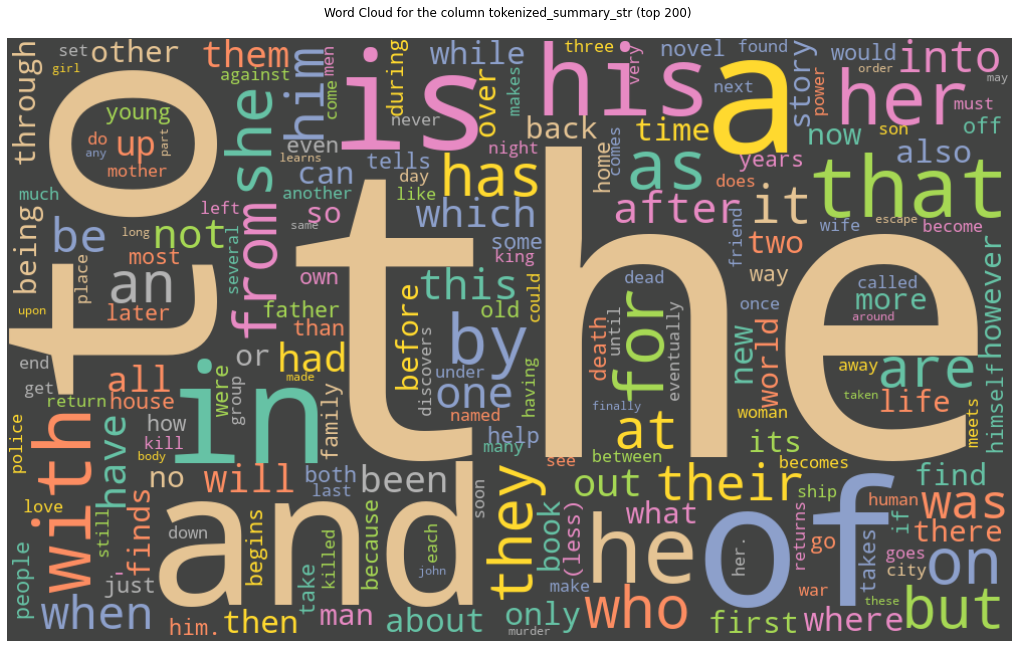

In [77]:
plot_world_cloud(df=data, column="tokenized_summary_str", nb_top=200)

# 3. Preprocessing the textual data

Here we apply NLP to the column ``data['summary']``

## 3.1 Remove stop words

In [78]:
import nltk

from nltk.corpus import stopwords

nltk.download("punkt") # punctuation
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Remove the stop-words**

Notice that the words such "is" and "the" does not appear any more in the clean summary column.

In [79]:
data['clean_tokenized_summary'] = data['tokenized_summary'].apply(lambda x:[word for word in x if word not in stop_words and word.isalnum()])
data['clean_tokenized_summary']

0       [drowned, wednesday, first, trustee, among, mo...
1       [book, opens, jason, awakens, school, bus, una...
2       [cugel, easily, persuaded, merchant, fianosthe...
3       [book, opens, herald, mage, vanyel, returning,...
4       [taran, gurgi, returned, caer, dallben, follow...
                              ...                        
4652    [atticus, sullivan, last, druids, lives, peace...
4653    [charlie, bucket, wonderful, adventure, begins...
4654    [live, dream, children, born, free, says, like...
4655    [rose, loves, dimitri, dimitri, might, love, t...
4656    [prince, value, brishen, khaskem, prince, kai,...
Name: clean_tokenized_summary, Length: 4657, dtype: object

In [80]:
type(data['clean_tokenized_summary'][0])

list

In [81]:
def list_to_string_2 (l):
    string = ', '.join(l)
    #string = string.replace(' ', ', ')
    return string

In [82]:
data['clean_tokenized_summary_str'] = data.apply(lambda row: list_to_string_2(row['clean_tokenized_summary']), axis=1)

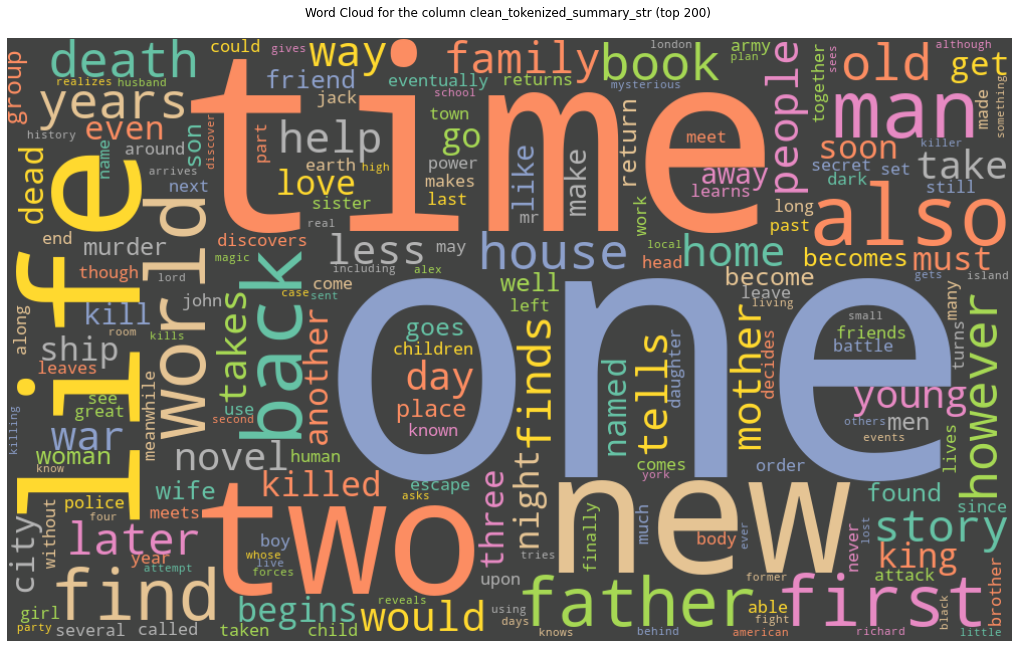

In [83]:
plot_world_cloud(df=data, column="clean_tokenized_summary_str", nb_top=200)

## 3.2 Most common words

It is good idea to remove the common words from the corpus. By definition they appear in most of the documents (i.e. the summaries). They do not contribute to distinguish the documents and probably make only noise.

In [102]:
data['better_clean_tokenized_summary'] = data['clean_tokenized_summary']
data['better_clean_tokenized_summary']

0       [drowned, wednesday, first, trustee, among, mo...
1       [book, opens, jason, awakens, school, bus, una...
2       [cugel, easily, persuaded, merchant, fianosthe...
3       [book, opens, herald, mage, vanyel, returning,...
4       [taran, gurgi, returned, caer, dallben, follow...
                              ...                        
4652    [atticus, sullivan, last, druids, lives, peace...
4653    [charlie, bucket, wonderful, adventure, begins...
4654    [live, dream, children, born, free, says, like...
4655    [rose, loves, dimitri, dimitri, might, love, t...
4656    [prince, value, brishen, khaskem, prince, kai,...
Name: better_clean_tokenized_summary, Length: 4657, dtype: object

# 3.3 Stemming / Lemmatisation

In [98]:
# Stemming of tokens

stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.wordnet.WordNetLemmatizer()

In [101]:
data['stemmed_better_clean_tokenized_summary'] = data.apply(lambda row : [stemmer.stem(w) for w in row['better_clean_tokenized_summary']], axis=1)

In [103]:
data['stemmed_better_clean_tokenized_summary_str'] = data.apply(lambda row: list_to_string_2(row['stemmed_better_clean_tokenized_summary']), axis=1)

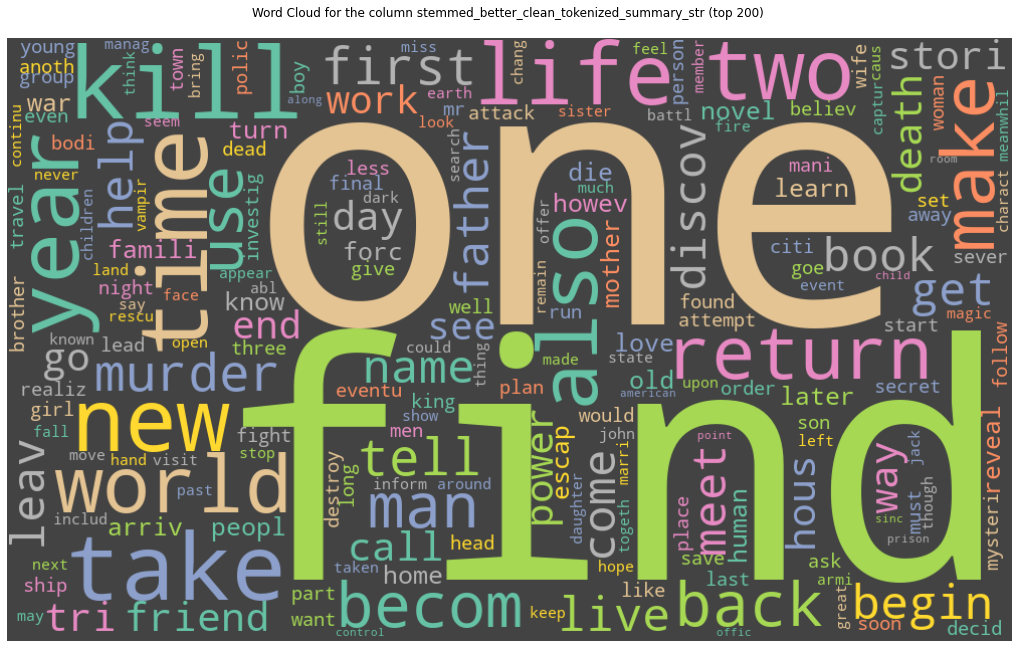

In [104]:
plot_world_cloud(df=data, column='stemmed_better_clean_tokenized_summary_str', nb_top=200)

# Vectorization

In [105]:
# Préparation des labels et des données

from sklearn.model_selection import train_test_split

y = data['genre'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(list(data['stemmed_better_clean_tokenized_summary_str']), y, 
                                                   test_size=0.2, 
                                                   random_state = 0, 
                                                   #stratify = y,
                                                   shuffle=True)

In [106]:
max_length = max(data['stemmed_better_clean_tokenized_summary_str'].apply(lambda row : len(row)))
max_length

20662

In [107]:
# Utilisation d'un preprocesseur

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=max_length)
vectorizer.adapt(X_train)

In [108]:
# Aperçu des 5 premiers mots dans ma liste de vocabulaire 

vectorizer.get_vocabulary()[:6]

['', '[UNK]', 'one', 'find', 'kill', 'time']

In [109]:
# Extraction de l'embedding Glove en 50 dimensions
import os 

path_to_glove_file = os.path.join(
    os.path.expanduser("~"), "/content/drive/MyDrive/Shared Datasets/Embeddings/glove.6B.50d.txt"
)

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [110]:
# Préparation de la matrix d'embedding

voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

num_tokens = len(voc) + 2
embedding_dim = 50
hits = 0
misses = 0


embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 12964 words (7036 misses)


## Word embedding

In [111]:
# Instanciation de la matrice d'embedding

from tensorflow.keras.layers import Embedding
from tensorflow.keras import initializers

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=initializers.Constant(embedding_matrix),
    trainable=False,
)

In [112]:
genres = data['genre'].unique()

In [113]:
from tensorflow.keras import layers, Input, Model

int_sequences_input = Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.BatchNormalization(epsilon=1e-05, momentum=0.1)(embedded_sequences)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.MaxPooling1D(5)(x)
x = layers.BatchNormalization(epsilon=1e-05, momentum=0.1)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
output_nlp = layers.Dense(len(genres), activation="softmax")(x)
                          
model_nlp = Model(int_sequences_input, output_nlp)
model_nlp.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_2 (Embedding)     (None, None, 50)          1000100   
                                                                 
 batch_normalization_4 (Batc  (None, None, 50)         200       
 hNormalization)                                                 
                                                                 
 conv1d_6 (Conv1D)           (None, None, 128)         32128     
                                                                 
 dropout_4 (Dropout)         (None, None, 128)         0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, None, 128)        0         
 1D)                                                       

In [114]:
x_train = vectorizer(np.array([[s] for s in X_train])).numpy()
x_test = vectorizer(np.array([[s] for s in X_test])).numpy()

y_train = np.array(y_train)
y_test = np.array(y_test)

In [117]:
# Entraînement

# callback = callbacks.EarlyStopping(monitor='val_loss', patience=5)

model_nlp.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"]
)
history = model_nlp.fit(x_train, y_train,
                        batch_size=16, 
                        #callbacks=callback, 
                        epochs=15,
                        validation_split=0.2,
                        verbose=2)

Epoch 1/15
187/187 - 15s - loss: 2.0065 - acc: 0.2456 - val_loss: 1.8235 - val_acc: 0.2792 - 15s/epoch - 81ms/step
Epoch 2/15
187/187 - 14s - loss: 1.8062 - acc: 0.3178 - val_loss: 1.7688 - val_acc: 0.3114 - 14s/epoch - 75ms/step
Epoch 3/15
187/187 - 14s - loss: 1.6578 - acc: 0.3829 - val_loss: 1.5200 - val_acc: 0.4470 - 14s/epoch - 76ms/step
Epoch 4/15
187/187 - 14s - loss: 1.5754 - acc: 0.4084 - val_loss: 1.4872 - val_acc: 0.4765 - 14s/epoch - 76ms/step
Epoch 5/15
187/187 - 14s - loss: 1.4920 - acc: 0.4560 - val_loss: 1.4636 - val_acc: 0.4926 - 14s/epoch - 77ms/step
Epoch 6/15
187/187 - 14s - loss: 1.4123 - acc: 0.4883 - val_loss: 1.5062 - val_acc: 0.4564 - 14s/epoch - 76ms/step
Epoch 7/15
187/187 - 14s - loss: 1.3516 - acc: 0.5114 - val_loss: 1.4632 - val_acc: 0.4993 - 14s/epoch - 77ms/step
Epoch 8/15
187/187 - 14s - loss: 1.3194 - acc: 0.5195 - val_loss: 1.4280 - val_acc: 0.5007 - 14s/epoch - 77ms/step
Epoch 9/15
187/187 - 15s - loss: 1.2749 - acc: 0.5342 - val_loss: 1.9553 - val_a

In [118]:
def PlotModel(history=history, metric='acc', metric_val='val_acc', loss='loss',
              val_loss='val_loss'):  
  ### Graphique des résultats de l'entraînement ###
  plt.plot(history.history[metric])
  plt.plot(history.history[metric_val])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  plt.plot(history.history[loss])
  plt.plot(history.history[val_loss])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()


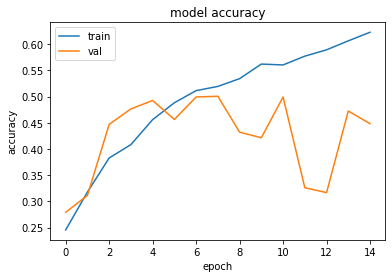

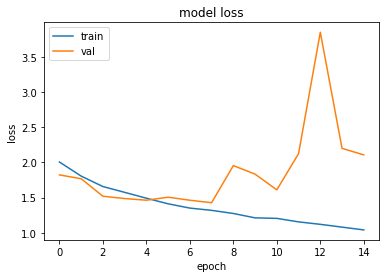

In [119]:
PlotModel(history=history)